# AR (Auto Regressive) Model

## AR(p)
## Autoregressive Model
In a moving average model as we saw with Holt-Winters, we forecast the variable of interest using a linear combination of predictors. In our example we forecasted numbers of airline passengers in thousands based on a set of level, trend and seasonal predictors.

In an autoregression model, we forecast using a linear combination of <em>past values</em> of the variable. The term <em>autoregression</em> describes a regression of the variable against itself. An autoregression is run against a set of <em>lagged values</em> of order $p$.

### $y_{t} = c + \phi_{1}y_{t-1} + \phi_{2}y_{t-2} + \dots + \phi_{p}y_{t-p} + \varepsilon_{t}$

where $c$ is a constant, $\phi_{1}$ and $\phi_{2}$ are lag coefficients up to order $p$, and $\varepsilon_{t}$ is white noise.

For example, an <strong>AR(1)</strong> model would follow the formula

&nbsp;&nbsp;&nbsp;&nbsp;$y_{t} = c + \phi_{1}y_{t-1} + \varepsilon_{t}$

whereas an <strong>AR(2)</strong> model would follow the formula

&nbsp;&nbsp;&nbsp;&nbsp;$y_{t} = c + \phi_{1}y_{t-1} + \phi_{2}y_{t-2} + \varepsilon_{t}$

and so on.

Note that the lag coeffients are usually less than one, as we usually restrict autoregressive models to stationary data.<br>
Specifically, for an <strong>AR(1)</strong> model: $-1 \lt \phi_1 \lt 1$<br>
and for an <strong>AR(2)</strong> model: $-1 \lt \phi_2 \lt 1, \ \phi_1 + \phi_2 \lt 1, \ \phi_2 - \phi_1 \lt 1$<br>

Models <strong>AR(3)</strong> and higher become mathematically very complex. Fortunately statsmodels does all the heavy lifting for us.

In [44]:
import numpy as np
import pandas as pd

from sklearn.metrics import mean_squared_error

from statsmodels.tsa.ar_model import AutoReg, ar_select_order

In [4]:
df = pd.read_csv("uspopulation.csv", index_col= 0, parse_dates= True)

In [5]:
df.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


In [6]:
df.index

DatetimeIndex(['2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01',
               '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01',
               '2011-09-01', '2011-10-01', '2011-11-01', '2011-12-01',
               '2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01',
               '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01',
               '2012-09-01', '2012-10-01', '2012-11-01', '2012-12-01',
               '2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01',
               '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01',
               '2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01',
               '2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
      

In [7]:
df.index.freq = "MS"

In [8]:
df.index

DatetimeIndex(['2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01',
               '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01',
               '2011-09-01', '2011-10-01', '2011-11-01', '2011-12-01',
               '2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01',
               '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01',
               '2012-09-01', '2012-10-01', '2012-11-01', '2012-12-01',
               '2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01',
               '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01',
               '2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01',
               '2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
      

<AxesSubplot:xlabel='DATE'>

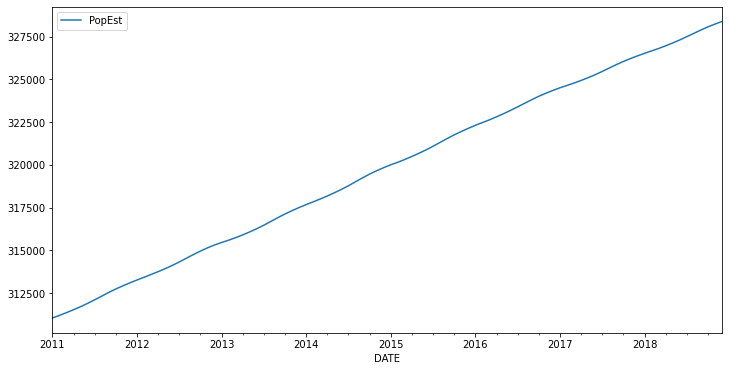

In [9]:
df.plot(figsize= (12,6))

### Train Test Split:

In [10]:
len(df)

96

In [11]:
train_data = df[:84]

In [12]:
test_data = df[84:]

In [13]:
train_data.shape

(84, 1)

In [14]:
test_data.shape

(12, 1)

### 1) AR Model with Lag = 1 (AR(1)):

In [24]:
model1 = AutoReg(train_data["PopEst"], lags= 1)

In [25]:
AR1Fit = ar1.fit()

In [26]:
AR1Fit.params

const        284.913797
PopEst.L1      0.999686
dtype: float64

In [30]:
# Predictions:

start = len(train_data)

end = len(test_data) + len(train_data) - 1

In [31]:
preds1 = AR1Fit.predict(start, end)

In [32]:
preds1

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, dtype: float64

In [33]:
test_data

,PopEst
DATE,
2018-01-01,326527
2018-02-01,326669
2018-03-01,326812
2018-04-01,326968
2018-05-01,327134
2018-06-01,327312
2018-07-01,327502
2018-08-01,327698
2018-09-01,327893


<AxesSubplot:xlabel='DATE'>

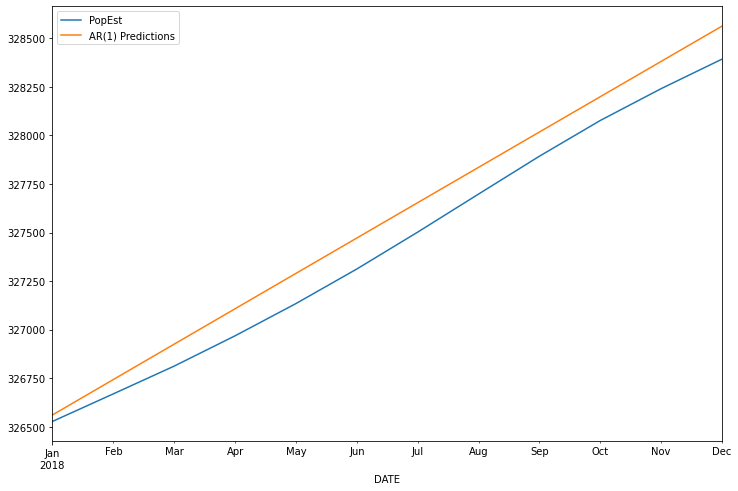

In [34]:
# Plotting Test Data and Predictions:

test_data["PopEst"].plot(figsize= (12,8), legend= True)
preds1.plot(figsize= (12,8), label= "AR(1) Predictions", legend= True)

### 2) AR Model with Lag = 2 (AR(2)):

In [35]:
model2 = AutoReg(train_data["PopEst"], lags= 2)

In [36]:
AR2Fit = model2.fit()

In [37]:
AR2Fit.params

const        137.368305
PopEst.L1      1.853490
PopEst.L2     -0.853836
dtype: float64

In [38]:
# Predictions:

preds2 = AR2Fit.predict(start, end)

In [39]:
preds2

2018-01-01    326535.672503
2018-02-01    326694.718510
2018-03-01    326854.882250
2018-04-01    327015.944948
2018-05-01    327177.719499
2018-06-01    327340.045896
2018-07-01    327502.787331
2018-08-01    327665.826847
2018-09-01    327829.064480
2018-10-01    327992.414809
2018-11-01    328155.804859
2018-12-01    328319.172308
Freq: MS, dtype: float64

<AxesSubplot:xlabel='DATE'>

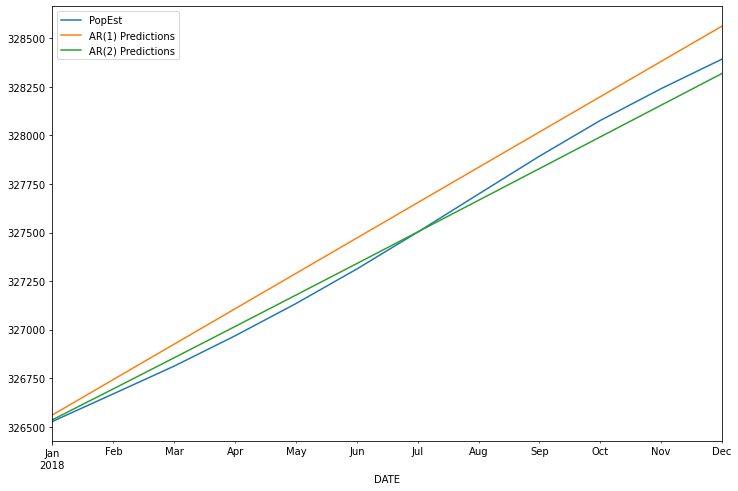

In [40]:
# Plotting Test Data and Predictions of Both Models:

test_data["PopEst"].plot(figsize= (12,8), legend= True)
preds1.plot(figsize= (12,8), label= "AR(1) Predictions", legend= True)
preds2.plot(figsize= (12,8), label= "AR(2) Predictions", legend= True)

### 3) Chosing Best Number of Lags:

In [52]:
lags = ar_select_order(train_data["PopEst"], maxlag= 10)

In [53]:
lags.ar_lags

[1, 2, 3, 4, 5, 6, 7, 8]

In [54]:
model = AutoReg(train_data["PopEst"], lags= lags.ar_lags)

In [55]:
ARFit = model.fit()

In [56]:
ARFit.params

const        82.309677
PopEst.L1     2.437997
PopEst.L2    -2.302100
PopEst.L3     1.565427
PopEst.L4    -1.431211
PopEst.L5     1.125022
PopEst.L6    -0.919494
PopEst.L7     0.963694
PopEst.L8    -0.439511
dtype: float64

In [57]:
# Predictions:

preds = ARFit.predict(start, end)

In [58]:
preds

2018-01-01    326523.865559
2018-02-01    326662.772568
2018-03-01    326805.746870
2018-04-01    326960.064201
2018-05-01    327130.572901
2018-06-01    327315.962732
2018-07-01    327511.010032
2018-08-01    327710.938277
2018-09-01    327907.425445
2018-10-01    328092.870664
2018-11-01    328264.133551
2018-12-01    328421.667095
Freq: MS, dtype: float64

<AxesSubplot:xlabel='DATE'>

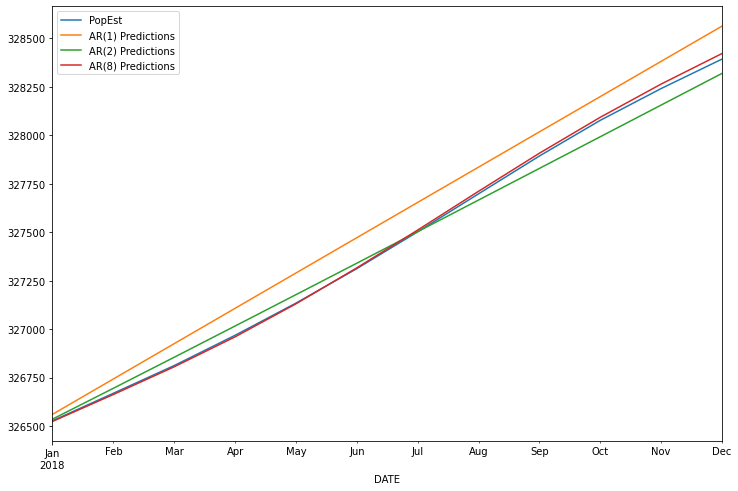

In [59]:
# Plotting Test Data and Predictions of All Models:

test_data["PopEst"].plot(figsize= (12,8), legend= True)
preds1.plot(figsize= (12,8), label= "AR(1) Predictions", legend= True)
preds2.plot(figsize= (12,8), label= "AR(2) Predictions", legend= True)
preds.plot(figsize= (12,8), label= "AR(8) Predictions", legend= True)

In [60]:
# Evaluation:

print(np.sqrt(mean_squared_error(test_data["PopEst"], preds1)))
print(np.sqrt(mean_squared_error(test_data["PopEst"], preds2)))
print(np.sqrt(mean_squared_error(test_data["PopEst"], preds)))

132.09736651264984
52.08894907376453
13.673718812930366


### 4) Forecasting Future Data:

In [61]:
lags = ar_select_order(df["PopEst"], maxlag= 10)

In [62]:
lags.ar_lags

[1, 2, 3, 4, 5, 6, 7, 8]

In [63]:
final_model = AutoReg(df["PopEst"], lags= lags.ar_lags).fit()

In [64]:
forecast = final_model.predict(len(df), len(df)+12)

In [65]:
forecast

2019-01-01    328537.134657
2019-02-01    328675.917689
2019-03-01    328818.863488
2019-04-01    328973.057117
2019-05-01    329142.516121
2019-06-01    329325.479775
2019-07-01    329516.233861
2019-08-01    329709.938434
2019-09-01    329899.389677
2019-10-01    330077.704927
2019-11-01    330242.358962
2019-12-01    330394.543650
2020-01-01    330538.846142
Freq: MS, dtype: float64

<AxesSubplot:xlabel='DATE'>

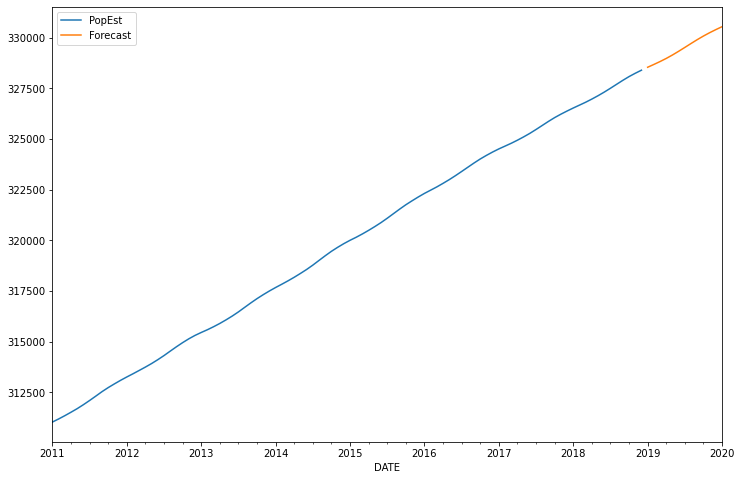

In [66]:
df["PopEst"].plot(figsize= (12,8), legend= True)
forecast.plot(figsize= (12,8), label= "Forecast", legend= True)